<a href="https://colab.research.google.com/github/AmiraliEsi83/ImageNet-data-base/blob/main/vgg16onIMAGENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=7ee9956ef4ae3f9ef7f2610f299409e4463f3a23dac4f21faeab9f48b95e0999
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


###download Imagenet data-set from Stanford URL
###100_000images in 200 classes
####training_data + validation_data + test_data

In [4]:
import os, sys, wget
from zipfile import ZipFile
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found
not found
not found


In [5]:
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
# check for gpu avaiability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


### show sample image from training set

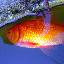

In [7]:
from IPython.display import Image
Image('/content/tiny-imagenet-200/train/n01443537/images/n01443537_100.JPEG')

## Prepare our data from paths

In [8]:
import os
f = open('/content/tiny-imagenet-200/wnids.txt')
all_files = [fn.strip() for fn in f.readlines()]
all_files
len(all_files)

200

In [9]:
file_names = ['/content/tiny-imagenet-200/train/'+fn+'/images/'+fn+'_' for fn in all_files]
file_names

['/content/tiny-imagenet-200/train/n02124075/images/n02124075_',
 '/content/tiny-imagenet-200/train/n04067472/images/n04067472_',
 '/content/tiny-imagenet-200/train/n04540053/images/n04540053_',
 '/content/tiny-imagenet-200/train/n04099969/images/n04099969_',
 '/content/tiny-imagenet-200/train/n07749582/images/n07749582_',
 '/content/tiny-imagenet-200/train/n01641577/images/n01641577_',
 '/content/tiny-imagenet-200/train/n02802426/images/n02802426_',
 '/content/tiny-imagenet-200/train/n09246464/images/n09246464_',
 '/content/tiny-imagenet-200/train/n07920052/images/n07920052_',
 '/content/tiny-imagenet-200/train/n03970156/images/n03970156_',
 '/content/tiny-imagenet-200/train/n03891332/images/n03891332_',
 '/content/tiny-imagenet-200/train/n02106662/images/n02106662_',
 '/content/tiny-imagenet-200/train/n03201208/images/n03201208_',
 '/content/tiny-imagenet-200/train/n02279972/images/n02279972_',
 '/content/tiny-imagenet-200/train/n02132136/images/n02132136_',
 '/content/tiny-imagenet-

In [10]:
file_names_test = os.listdir('/content/tiny-imagenet-200/test/images')

In [11]:
len(file_names_test)

10000

In [12]:
all_pic_path = []
for i in range(len(file_names)):
  for j in range(500):
    all_pic_path.append(file_names[i]+str(i)+'.JPEG')

In [13]:
print(len(all_pic_path))
print(all_pic_path[0])

100000
/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG


In [14]:
X = all_pic_path

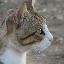

In [15]:
Image(all_pic_path[0])

In [16]:
import numpy as np
y = []
for i in range(200):
  y.append([i]*500)

In [17]:
y = np.array(y)
y.shape

(200, 500)

In [18]:
y = y.ravel()
print(len(y))
print(y[500])

100000
1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
NUM_OF_IMAGES = 1000
X_train, X_val,y_train, y_val = train_test_split(X[:NUM_OF_IMAGES], y[:NUM_OF_IMAGES], test_size =0.2, random_state=42)

In [21]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [22]:
print(X_train[0])
print(y_train[0])

/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG
0


In [23]:
from matplotlib.pyplot import imread

In [24]:
image = imread(X[0])
image.shape

(64, 64, 3)

In [25]:
image.max()

248

In [26]:
image.min()

0

convert image to tensor

In [27]:
tf.constant(image)

<tf.Tensor: shape=(64, 64, 3), dtype=uint8, numpy=
array([[[102, 107, 100],
        [115, 118, 111],
        [117, 118, 112],
        ...,
        [125, 124, 119],
        [121, 120, 115],
        [120, 119, 114]],

       [[ 89,  94,  87],
        [ 98, 103,  96],
        [105, 108, 101],
        ...,
        [117, 116, 111],
        [113, 112, 107],
        [110, 109, 104]],

       [[ 61,  66,  59],
        [ 77,  82,  75],
        [ 91,  94,  87],
        ...,
        [115, 114, 109],
        [113, 112, 107],
        [109, 108, 103]],

       ...,

       [[102, 109, 119],
        [127, 133, 145],
        [151, 159, 170],
        ...,
        [119, 116, 111],
        [123, 120, 115],
        [117, 114, 109]],

       [[ 76,  83,  93],
        [ 89,  96, 106],
        [111, 119, 130],
        ...,
        [103, 100,  95],
        [106, 103,  98],
        [ 98,  95,  90]],

       [[ 71,  78,  88],
        [ 69,  76,  86],
        [ 81,  87,  99],
        ...,
        [106, 103,  98]

In [28]:
IMG_SIZE = 224

In [29]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  # scale and normalize values between 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [30]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return (image,label)

In [31]:
get_image_label(X[22], tf.constant(y[22]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.40000004, 0.42352945, 0.38431376],
         [0.40000004, 0.42352945, 0.38431376],
         [0.40924373, 0.43277314, 0.39355746],
         ...,
         [0.46834734, 0.46834734, 0.4369748 ],
         [0.4666667 , 0.4666667 , 0.43529415],
         [0.4666667 , 0.4666667 , 0.43529415]],
 
        [[0.40000004, 0.42352945, 0.38431376],
         [0.40000004, 0.42352945, 0.38431376],
         [0.40924373, 0.43277314, 0.39355746],
         ...,
         [0.46834734, 0.46834734, 0.4369748 ],
         [0.4666667 , 0.4666667 , 0.43529415],
         [0.4666667 , 0.4666667 , 0.43529415]],
 
        [[0.38823533, 0.41176474, 0.37254906],
         [0.38823533, 0.41176474, 0.37254906],
         [0.39729896, 0.42082837, 0.3816127 ],
         ...,
         [0.4603041 , 0.4603041 , 0.42893156],
         [0.45826334, 0.45826334, 0.4268908 ],
         [0.45826334, 0.45826334, 0.4268908 ]],
 
        ...,
 
        [[0.282633  , 0.310084  

In [32]:
BATCH_SIZE = 32

In [33]:
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data=False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [34]:
training_data = create_data_batches(X_train, y_train)

In [35]:
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [37]:
import matplotlib.pyplot as plt

In [38]:
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(y[i])

In [39]:
training_images, train_labels = next(training_data.as_numpy_iterator())

In [40]:
training_images, train_labels

(array([[[[0.40000004, 0.42352945, 0.38431376],
          [0.40000004, 0.42352945, 0.38431376],
          [0.40924373, 0.43277314, 0.39355746],
          ...,
          [0.46834734, 0.46834734, 0.4369748 ],
          [0.4666667 , 0.4666667 , 0.43529415],
          [0.4666667 , 0.4666667 , 0.43529415]],
 
         [[0.40000004, 0.42352945, 0.38431376],
          [0.40000004, 0.42352945, 0.38431376],
          [0.40924373, 0.43277314, 0.39355746],
          ...,
          [0.46834734, 0.46834734, 0.4369748 ],
          [0.4666667 , 0.4666667 , 0.43529415],
          [0.4666667 , 0.4666667 , 0.43529415]],
 
         [[0.38823533, 0.41176474, 0.37254906],
          [0.38823533, 0.41176474, 0.37254906],
          [0.39729896, 0.42082837, 0.3816127 ],
          ...,
          [0.4603041 , 0.4603041 , 0.42893156],
          [0.45826334, 0.45826334, 0.4268908 ],
          [0.45826334, 0.45826334, 0.4268908 ]],
 
         ...,
 
         [[0.282633  , 0.310084  , 0.34145653],
          [0.28263

In [41]:
len(training_images),len(train_labels)

(32, 32)

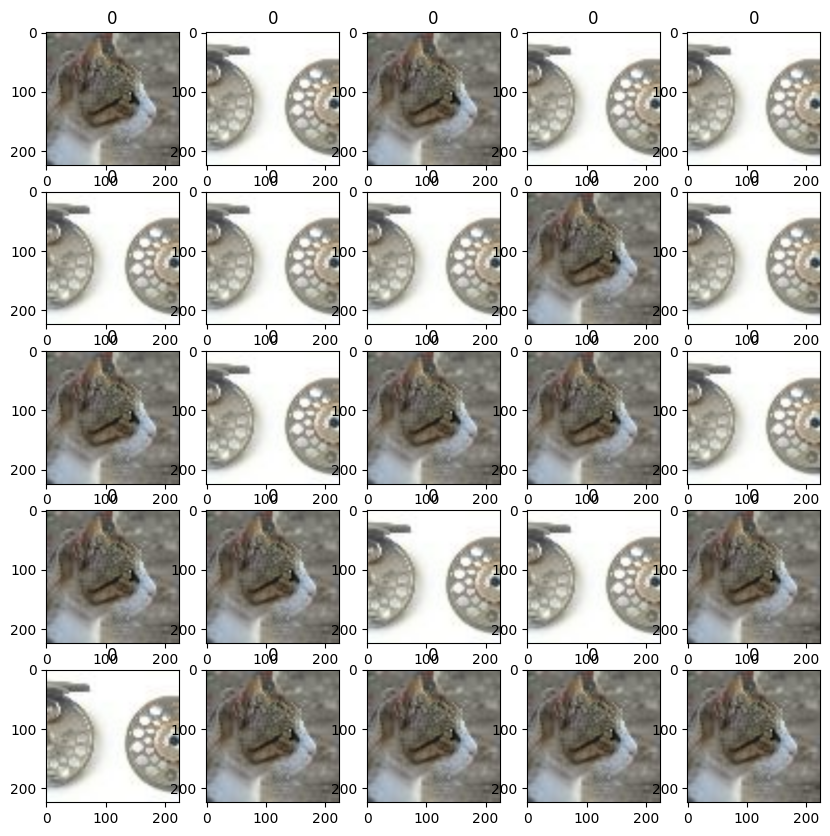

In [42]:
show_25_images(training_images, train_labels)

In [43]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [44]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=200,
                    input_shape=(224,224,3)
                   )

58889256/58889256 [==============================] - 0s 0us/step


In [45]:
model = tf.keras.Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [46]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(4096, activation='relu', name='hidden1'))
model.add(Dense(200, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [48]:
history = model.fit(x = training_data, epochs=10,validation_data=val_data, validation_freq=1)

Epoch 1/10
25/25 [==============================] - 39s 513ms/step - loss: 5.1579 - accuracy: 0.5900 - val_loss: 0.1789 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 11s 458ms/step - loss: 0.2340 - accuracy: 0.8662 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 11s 436ms/step - loss: 1.1898e-04 - accuracy: 1.0000 - val_loss: 5.7220e-07 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 11s 458ms/step - loss: 2.9221e-07 - accuracy: 1.0000 - val_loss: 1.1444e-07 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 12s 460ms/step - loss: 1.0177e-07 - accuracy: 1.0000 - val_loss: 5.7220e-08 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 12s 462ms/step - loss: 6.0201e-08 - accuracy: 1.0000 - val_loss: 5.7220e-08 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 12s 468ms/step - loss: 6.0201e-08 - accuracy: 1.0000 - val

In [49]:
evaluation = model.evaluate(val_data)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

7/7 [==============================] - 1s 115ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 100.00%


In [52]:
predicted_classes = model.predict(val_data)
len(predicted_classes)

7/7 [==============================] - 1s 119ms/step


200